Need the fully executed ipynb file (preferably written on google collab) written for the given dataset. Need it within the next 8 hours. The quicker it is delivered the better.
You have to do the following tasks:

1. Combine TI and AB to form a single "Text" column.

2. Preprocess the text column - normalize, remove stopwords, punctuation and numbers, and lemmatize. If you can, get bigrams as well.

3. For each company, create a text file that concatenates the patent titles and abstracts (i.e., the text column). This step will give you 27 files (as there 27 companies in the dataset).

4. Use the 27 files to create a hierarchical cluster of the companies. Also, create a MDS map of the companies.

5. Perform topic modeling using LDA and NMF on the "Text" column (not on the 27 files). Assume that there are 40 topics in the corpus.

6. LDA will give you a document-topic matrix that shows the probability distribution of each document (i.e., patent) across the topics). Note that there will be many patents from a company. You need to find the average of the probabilities for each of the topics for each company. This will give you 27 rows, one for each company. The row will contain the average probability for each topic. Perform a hierarchical cluster of this data to see the similarity between companies based on topics.

Summary of required output:

a. 40 topics using NMF and LDA

b. Hierarchical cluster of companies based on text similarity of patents

c. MDS map of the companies using text similarity

In [1]:
import re
from nltk.stem import *
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords, gutenberg
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from scipy.cluster import hierarchy
from scipy import sparse
import pylab
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib.collections import LineCollection
from sklearn.manifold import MDS
from nltk.stem import WordNetLemmatizer
%matplotlib inline
#___________________________________
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to C:\Users\sameh-
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\sameh-
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\sameh-
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## text prepocessing 

In [2]:
def remove_punct(text):
    # Remove Punctuation using regex
    return re.sub(r'[^\w\s]', '', text)


In [3]:
def remove_numbers(text):
    # Remove Punctuation using regex
    return re.sub('[^A-Za-z]+', ' ', text)


In [4]:
def remove_stopwords(text):
    pattern = re.compile(
        r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    return pattern.sub('', text.lower())


In [5]:
def limtize(text):
    lemmatizer = WordNetLemmatizer()
    results =''

    for item in text.split():
       results+= lemmatizer.lemmatize(item)+' '
        
    return results



## read csv file 

In [6]:
patents = pd.read_csv('patents_30.csv',)
# patents


## concatenat tow column 

In [7]:

patents['Text'] = patents['TI'] + ' ' + \
    patents['AB']    # Concatenate the two columns
# patents


In [8]:
mylist = []
for i in patents.index:
   mylist.append(limtize(remove_stopwords(
       remove_numbers(remove_punct(patents['Text'][i])))))
patents['new_Text'] = mylist
patents


,AE,TI,AB,Year,CP,AE_ABBREV,Text,new_Text
0,SAMSUNG ELECTRONICS CO LTD (SMSU-C),Method for handshaking terminal in radio commu...,NOVELTY - The method involves noticing firs...,2018,WO2018084624-A1 -- WO2010082775-A2 LG ELECTR...,(SMSU-C),Method for handshaking terminal in radio commu...,method handshaking terminal radio communicatio...
1,SAMSUNG ELECTRONICS CO LTD (SMSU-C),Method for handling control data by mobility m...,NOVELTY - The method involves receiving a n...,2018,WO2018008977-A1 -- KR2013103428-A SAMSUNG EL...,(SMSU-C),Method for handling control data by mobility m...,method handling control data mobility manageme...
2,HUAWEI TECHNOLOGIES CO LTD (HUAW-C),Method for receiving channel state information...,NOVELTY - The method involves receiving a n...,2017,WO2017114474-A1 -- CN101394378-A INNOFIDEI T...,(HUAW-C),Method for receiving channel state information...,method receiving channel state information ter...
3,SAMSUNG ELECTRONICS CO LTD (SMSU-C),Method for receiving signal in receiving appar...,NOVELTY - The method involves decoding a co...,2017,US2017187491-A1 -- US20050216821-A1 ; US788...,(SMSU-C),Method for receiving signal in receiving appar...,method receiving signal receiving apparatus co...
4,QUALCOMM INC (QCOM-C),Wireless communication method for over-the-air...,NOVELTY - The method involves receiving (50...,2018,; WO2018236480-A1 -- EP2154802-A1 MITSUBISH...,(QCOM-C),Wireless communication method for over-the-air...,wireless communication method overtheair phase...
...,...,...,...,...,...,...,...,...
7622,QUALCOMM INC (QCOM-C),Feedback method for use in wireless communicat...,NOVELTY - The method involves identifying a...,2020,US2020259532-A1 -- US20100034303-A1 ; US201...,(QCOM-C),Feedback method for use in wireless communicat...,feedback method use wireless communication inv...
7623,SAMSUNG ELECTRONICS CO LTD (SMSU-C),Idle mode measurement method for supporting ca...,NOVELTY - The idle mode measurement method ...,2020,; WO2020166895-A1 -- KR1616253-B1 LG ELECTR...,(SMSU-C),Idle mode measurement method for supporting ca...,idle mode measurement method supporting carrie...
7624,VIVO MOBILE COMMUNICATION CO LTD (BBKO-C),Signal processing circuit for use in a mobile ...,NOVELTY - The signal processing circuit com...,2020,CN111525941-A -- CN101835250-A HUAWEI DEVICE...,(BBKO-C),Signal processing circuit for use in a mobile ...,signal processing circuit use mobile communica...
7625,SAMSUNG ELECTRONICS CO LTD (SMSU-C),Transmission method using electronic device in...,NOVELTY - The method (300) involves obtaini...,2020,WO2020159303-A1 -- US20160135239-A1,(SMSU-C),Transmission method using electronic device in...,transmission method using electronic device wi...


## part 3 create list for each company after that create text files 

In [9]:
def creat_file(text, name):
    with open(name, 'w') as f:
        f.write(text)  
        f.close() 

def read_text(name):
    with open(name, 'r') as f:
        text = f.read()
        f.close()
        return text

In [10]:
company = list(set(patents['AE_ABBREV']))
company_text = []   # List to store the text of each company
for i in company:
    text='' 
    for index, row in patents.iterrows():
        if row['AE_ABBREV'] == i:
            text += row['new_Text']+' '
    company_text.append([i, text])
    creat_file(text, i+'.txt')


## part 4 read text file and apply lda and tf-IDF and apply  hierarchical cluster 

In [11]:
files_text =[]
for i in company:
    files_text.append( read_text(i+'.txt'))

data = pd.DataFrame(files_text,columns=['text'])
data['company']= company
# data


In [12]:
# TF-Idf
def TF_Idf_transform(corpus):
  tfidf = TfidfVectorizer()
  tfidf_pickle = tfidf.fit(corpus)
  tfidf_model = tfidf.fit_transform(corpus)
  tfidf_obj_names = tfidf.get_feature_names()

  tfidf_1 = pd.DataFrame(tfidf_model.toarray(), columns=tfidf_obj_names)
  return tfidf_1


def lda_transform(corpus):
  count_vect = CountVectorizer()
  X_t = count_vect.fit_transform(corpus).todense()
  vectorizer = LatentDirichletAllocation(
      n_components=27, max_iter=10, n_jobs=-1)
  X = vectorizer.fit_transform(X_t)
  return X


def dist_matrix(features):
  dist_matrix = euclidean_distances(features, features)
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')
  return Z_using_dist_matrix


def draw_dendo(Z_using_dist_matrix):
  fig = pylab.figure(figsize=(18, 15))
  dendro = hierarchy.dendrogram(
      Z_using_dist_matrix, leaf_rotation=0, leaf_font_size=10, orientation='top')



In [13]:
#LDA Transform  and TF-IDF Transform for each company

LDA_out = lda_transform(data.iloc[:, 0])
print("Data dimensions  with LDA :", LDA_out.shape)
tfidf_1 = TF_Idf_transform(data.iloc[:, 0])
print("Data dimensions  with TF-IDF :", tfidf_1.shape)


c:\Users\sameh-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\sameh-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Data dimensions  with LDA : (27, 27)
Data dimensions  with TF-IDF : (27, 14024)


c:\Users\sameh-pc\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Drow hierarical cluster dendro gram wih lda 

C:\Users\sameh-pc\AppData\Local\Temp/ipykernel_15836/3310185020.py:23: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')
C:\Users\sameh-pc\AppData\Local\Temp/ipykernel_15836/3310185020.py:23: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


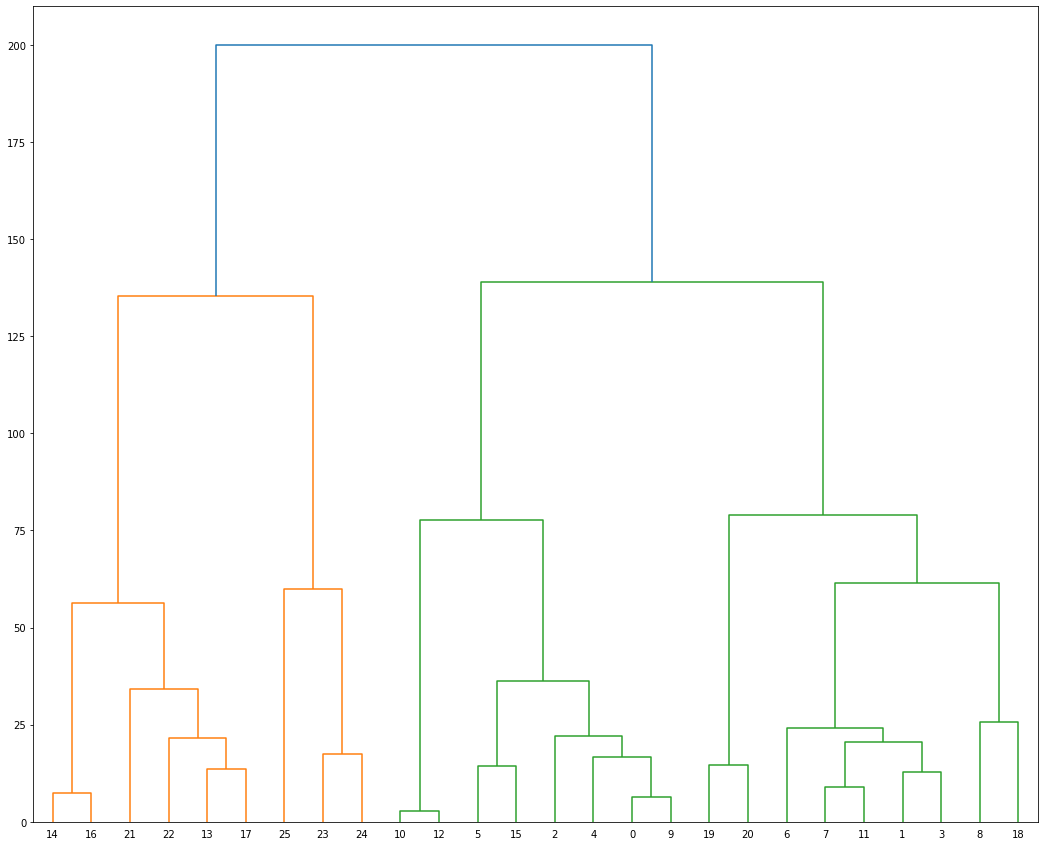

In [14]:
draw_dendo(dist_matrix(dist_matrix(LDA_out)))

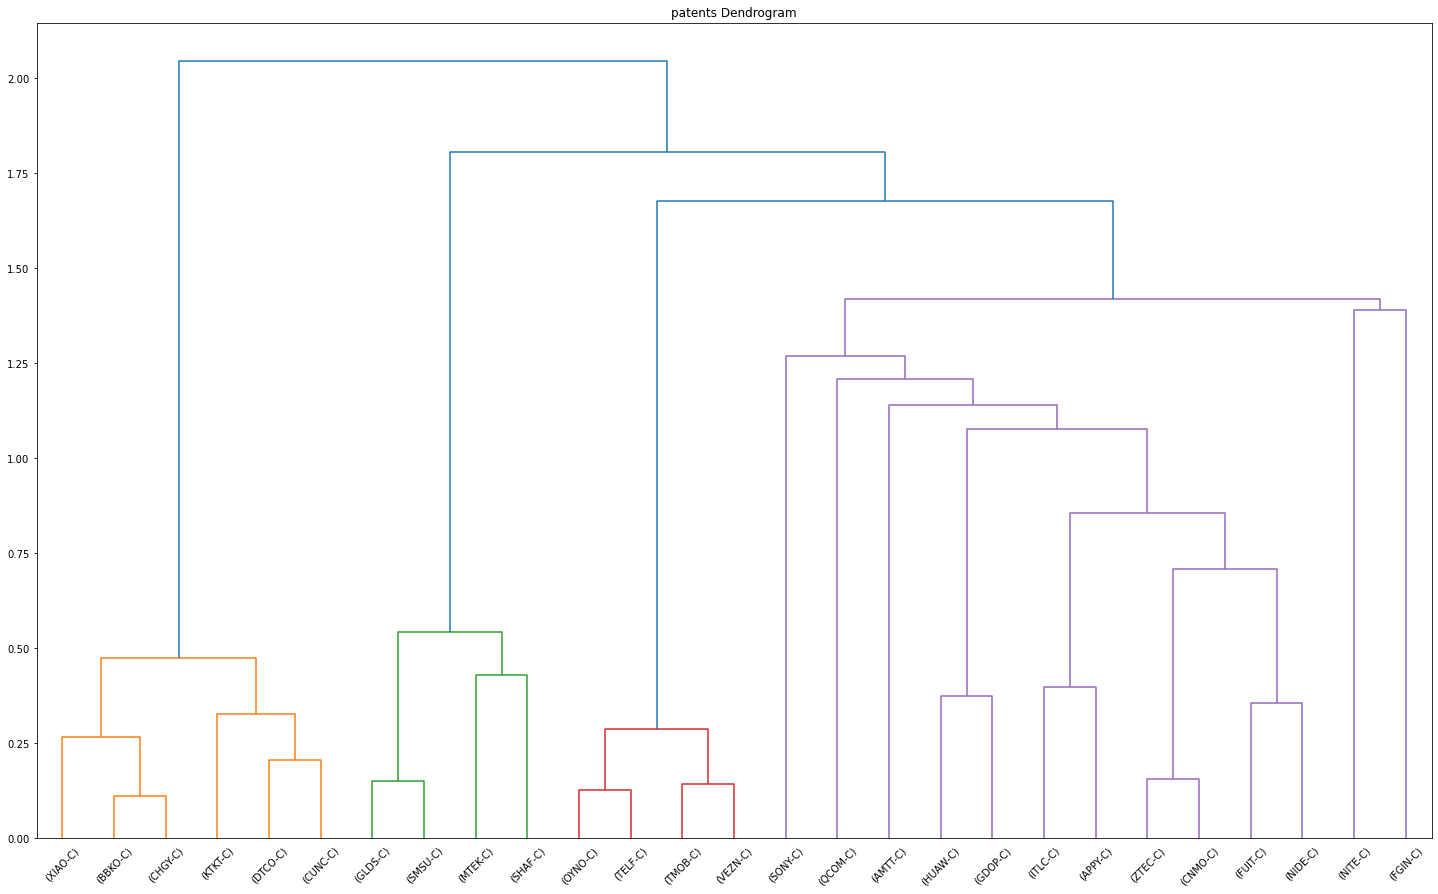

In [15]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(25, 15))
plt.title("patents Dendrogram")

clusters = shc.linkage(LDA_out,
                       method='ward',
                       metric="euclidean")
shc.dendrogram(Z=clusters, labels= np.asarray(data['company']))
plt.axhline(y=5, color='r', linestyle='-')
plt.show()


## MDS

(27, 27)


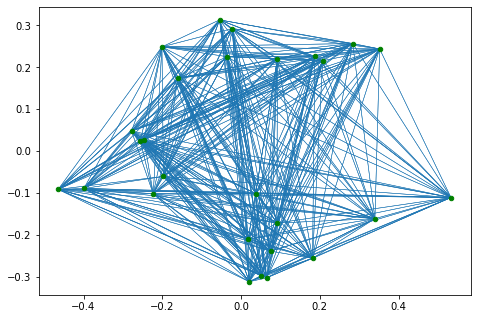

In [16]:

embedding = MDS(n_components=27)
X_true = embedding.fit_transform(tfidf_1)
print(X_true.shape)

clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

plt.scatter(X_true[:, 0], X_true[:, 1], s=20, c='g')


segments = [[X_true[i, :], X_true[j, :]]
            for i in range(len(X_true)) for j in range(len(X_true))]
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                   )
lc.set_linewidths(0.5 * np.ones(len(segments)))
ax.add_collection(lc)

plt.show()


## part 5
### lda on 40 topic

In [17]:
#LDA Transform
count_vect = CountVectorizer()
#  data from dataframe patents
X_t = count_vect.fit_transform(patents['new_Text']).todense()
lda = LatentDirichletAllocation(n_components=40, random_state=0)
LDA_out = lda.fit_transform(X_t)
print("Data dimensions  with LDA :", LDA_out.shape)


c:\Users\sameh-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\sameh-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Data dimensions  with LDA : (7627, 40)


In [18]:
# Create an NMF instance: model
# the 40 components will be the topics
from sklearn.decomposition import NMF
model = NMF(n_components=40, random_state=5)
model.fit(LDA_out)
nmf_features = model.transform(LDA_out)
nmf_features


c:\Users\sameh-pc\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


array([[2.35277499e-05, 1.40806461e-05, 3.49789559e-05, ...,
        3.68057581e-05, 3.14032241e-05, 4.66799205e-05],
       [2.45100663e-05, 2.64148580e-05, 5.03844620e-02, ...,
        1.40196231e-02, 4.62385944e-05, 7.42360431e-05],
       [2.65539676e-05, 1.12209750e-01, 3.41767337e-05, ...,
        4.86019933e-05, 4.15738204e-05, 7.85405446e-05],
       ...,
       [2.41646051e-05, 2.63250890e-05, 3.35933027e-05, ...,
        6.68565602e-05, 6.11747033e-05, 3.68043305e-05],
       [1.73212894e-05, 1.02572772e-02, 2.97852638e-05, ...,
        3.86409648e-05, 2.85911121e-02, 4.17415459e-05],
       [1.99569677e-05, 1.05185158e-02, 3.09109527e-05, ...,
        4.81589830e-05, 3.52494334e-05, 5.30807867e-02]])

## part 6  


### Create relation between company and topics 

In [19]:
#  function the give data and return the petents for each company
def build_company_list(data):

    company = list(set(data['AE_ABBREV']))
    company_l = []   # List to store the text of each company
    for i in company:
        comp_index = []
        for index, row in data.iterrows():
            if row['AE_ABBREV'] == i:
                comp_index.append(index)
        company_l.append([i, comp_index])
    return(company_l)

def build_company_lda_prop(lda_data, company_list_data):

    list_compy_prop = []
    for i in company_list_data:
        list_comp = []
        for item in i[1]:
            list_comp.append(lda_data[item])

        list_compy_prop.append([i[0], list_comp])
    return(list_compy_prop)

def get_avarage(list_company_prop):
    avg = []
    for com, val in list_company_prop:
        av = [sum(i)/len(val) for i in zip(*val)]
        avg.append([com, av])
    return(avg)


In [20]:
company_l = build_company_list(patents)
list_company_prop = build_company_lda_prop(LDA_out, company_l)
avarage = get_avarage(list_company_prop)

companys = [pair[0] for pair in avarage]
prob = [pair[1] for pair in avarage]
df_data = pd.DataFrame(prob, index=companys)
df_data.columns = ['Topic {}'.format(i+1) for i in range(40)]
df_data


,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 31,Topic 32,Topic 33,Topic 34,Topic 35,Topic 36,Topic 37,Topic 38,Topic 39,Topic 40
(HUAW-C),0.006815,0.003877,0.014342,0.012202,0.016904,0.014291,0.010745,0.038889,0.244204,0.032738,...,0.014516,0.030270,0.013906,0.019396,0.014240,0.027828,0.013345,0.008074,0.009578,0.024202
(MTEK-C),0.025620,0.015897,0.013677,0.009386,0.023329,0.005324,0.006532,0.014465,0.007357,0.036897,...,0.077983,0.032285,0.024674,0.008344,0.017240,0.029778,0.039301,0.017197,0.007324,0.019259
(ZTEC-C),0.006989,0.007052,0.023546,0.014437,0.034592,0.025682,0.014190,0.039106,0.052911,0.035862,...,0.032006,0.033670,0.009313,0.020046,0.024323,0.021525,0.036507,0.011937,0.015726,0.028012
(SHAF-C),0.014299,0.008903,0.023664,0.004333,0.015198,0.024672,0.001222,0.018251,0.027907,0.038155,...,0.052563,0.004869,0.012584,0.022576,0.005411,0.007392,0.009581,0.004855,0.177992,0.011525
(FUIT-C),0.007187,0.002737,0.013756,0.007786,0.011243,0.003221,0.008977,0.028721,0.065183,0.028216,...,0.003053,0.011275,0.050370,0.024125,0.009288,0.037739,0.014879,0.009497,0.223086,0.023906
(DTCO-C),0.006232,0.003695,0.008143,0.025336,0.071039,0.026504,0.006163,0.040680,0.045495,0.033060,...,0.028341,0.036926,0.015433,0.051117,0.039531,0.019247,0.012207,0.013210,0.005705,0.020085
(TMOB-C),0.010324,0.006773,0.016212,0.056275,0.014358,0.024587,0.068382,0.010140,0.008663,0.001888,...,0.049104,0.027206,0.022554,0.017795,0.029816,0.006983,0.170362,0.002984,0.005498,0.025346
(AMTT-C),0.011089,0.003967,0.029616,0.165995,0.011645,0.003911,0.018736,0.029115,0.012169,0.031758,...,0.007023,0.010720,0.029425,0.004709,0.013140,0.032674,0.114117,0.012511,0.003265,0.015928
(ITLC-C),0.026717,0.011276,0.028234,0.012637,0.010204,0.004938,0.008145,0.028117,0.008354,0.037001,...,0.014128,0.008956,0.036354,0.014676,0.033700,0.018999,0.042604,0.018901,0.009031,0.011954
(NITE-C),0.007312,0.003428,0.009148,0.001835,0.011724,0.002890,0.001329,0.031537,0.006644,0.040155,...,0.003772,0.003768,0.013972,0.005513,0.011971,0.008939,0.005627,0.008252,0.540550,0.012065


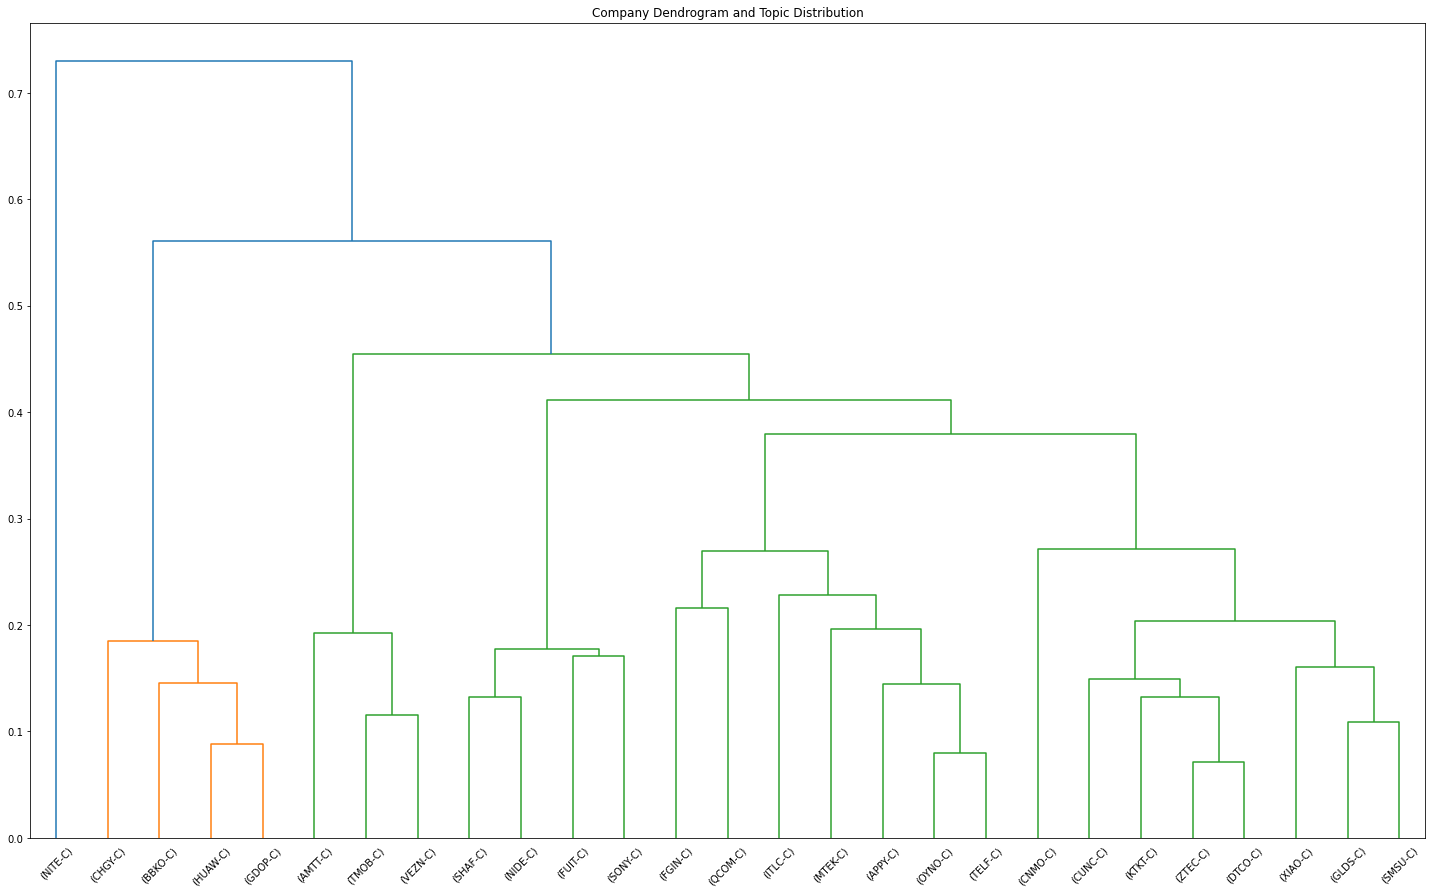

In [21]:
# plot dendrogram for each company with the lda propability
plt.figure(figsize=(25, 15))
plt.title("Company Dendrogram and Topic Distribution")

clusters = shc.linkage(df_data,
                       method='ward',
                       metric="euclidean")
shc.dendrogram(Z=clusters, labels=df_data.index)
plt.show()


## Extar information 

In [22]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys


def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)


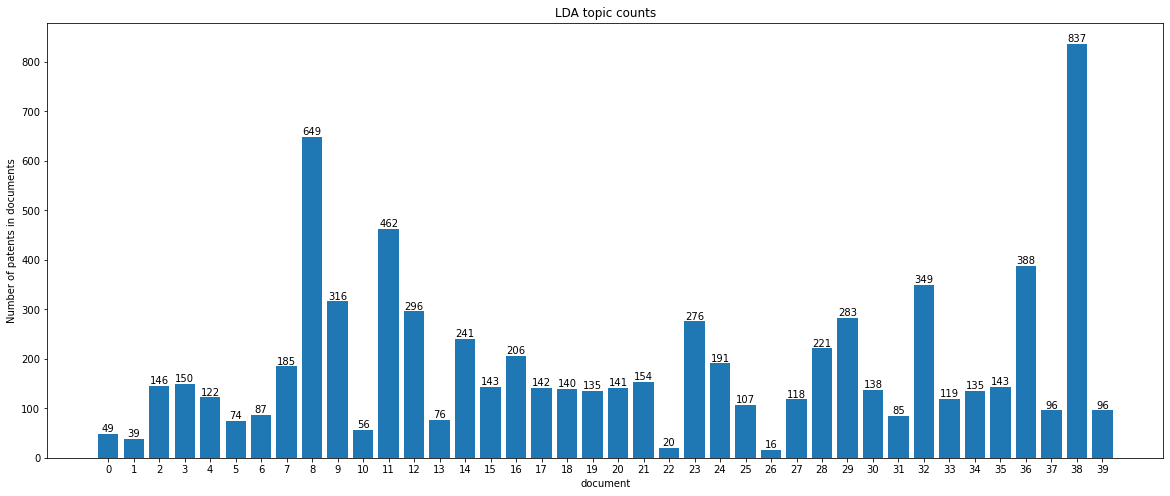

In [24]:
lda_keys = get_keys(LDA_out)
lda_categories, lda_counts = keys_to_counts(lda_keys)

fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(lda_categories, lda_counts)
ax.set_xticks(lda_categories)
# ax.set_xticklabels(labels)
ax.set_title('LDA topic counts')
ax.set_ylabel('Number of patents in documents')
ax.set_xlabel('document')
for b in ax.containers:
    ax.bar_label(b)
